# NetworkX

In [ ]:
import networkx as nx

#### Creazione Grafo

In [ ]:
G = nx.Graph()  # la classe Graph crea istanza vuota di undirected graph

#### Nodi
Any Python hashable object (es. int, string...)(except None) can represent a node, even another Graph.
This flexibility is very powerful as it allows graphs of graphs, graphs of files, and much more.

In [ ]:
H = nx.path_graph(10)  # Grafo fittizio

In [ ]:
G.add_node(1)  # Crea un nodo di tipo int
G.add_node(H)  # Il grafo H diventa nodo del grafo G
G.add_nodes_from([2, 3])  # Aggiunge nodi da lista
G.add_nodes_from(range(100, 110))  # Aggiunge nodi da range, 110 non compreso
G.add_node("spam")  # adds node "spam" di tipo string
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm' <-- ATTENZIONE
G.add_nodes_from(H)  # Aggiunge tutti i nodi di un altro grafo H, non aggiunge nodi già presenti

print(G.nodes)  # stampa lista dei nodi del grafo

[1, <networkx.classes.graph.Graph object at 0x7f676e0e5588>, 2, 3, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 'spam', 's', 'p', 'a', 'm', 0, 4, 5, 6, 7, 8, 9]


#### Archi
If some edges connect nodes not yet in the graph, the nodes are added automatically. There are no errors when adding nodes or edges that already exist.

In [ ]:
G.add_edge(1, 2)  # aggiunta arco singolo come unpacked tuple
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple con * perchè serve (2, 3) e non ((2, 3))
G.add_edges_from([(1, 2), (1, 3)])  # archi da ebunch
G.add_edges_from(H.edges)  # aggiunta archi da altro grafo H

print(G.edges)  # come sempre gli archi non sono inseriti se ripetuti

# Gli edges possono essere inseriti con tutti i containers di tuple chiamati EBUNCH:
# - se la tupla è di due elementi sono due nodi
# - se la tupla è di tre elementi i primi due sono nodi mentre il terzo un dizionario
# contenente attributi e valori dell'arco

[(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


#### Examining elements of a graph

In [ ]:
print("List of nodes:", list(G.nodes))
print("List of edges:", list(G.edges))
print("List of neighbors of node 1:", list(G.adj[1]))  # = list(G.neighbors(1))
print("Degree of node 1:", G.degree[1])  # the number of edges incident to node 1
print("Degree of more than 1 node:",G.degree([2, 3]))  # Nbunch is any of: None (meaning all nodes), a node, or an iterable container of nodes that is not itself a node in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

List of nodes: [1, <networkx.classes.graph.Graph object at 0x7f676e0e5588>, 2, 3, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 'spam', 's', 'p', 'a', 'm', 0, 4, 5, 6, 7, 8, 9]
List of edges: []
List of neighbors of node 1: []
Degree of node 1: 0
{}


#### Removing elements from a graph

In [ ]:
G.remove_node(2)  # rimouve un nodo, il 2
G.remove_nodes_from("spam")  # rimuove i nodi 's', 'p', 'a', 'm'
G.remove_edge(1, 3)
G.clear()  # Rimozione di tutti archi e nodi

#### Accessing edges and neighbors

In [ ]:
G = nx.Graph([(1, 2, {"color": "yellow"}), (1, 3)])  # Si crea un grafo con una lista di tuple di edges, cosa che crea anche i nodi, l'attributo è dell'arco
print(G[1])  # Neighborhood of node 1, G[1] è uguale a G.adj[1]
print(G[1][2])  # Attributi dell'arco tra 1 e 2, G[1][2] è uguale a G.edges[(1, 2)]
G[1][3]['color'] = "blue"  # Si inserisce o modifica un attributo così solo se l'arco già esiste
G.edges[(1, 2)]['color'] = "red"  # Si inserisce o modifica un attributo così solo se l'arco già esiste
print("Edges with attributes:", dict(G.edges))

{2: {'color': 'yellow'}, 3: {}}
{'color': 'yellow'}
Edges with attributes: {(1, 2): {'color': 'red'}, (1, 3): {'color': 'blue'}}


#### Script che esamina tutti gli archi ed i loro attributi

Gli undirected sono stampati in entrambe le direzioni

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(1, 3, 0.750)
(2, 1, 0.125)
(2, 4, 1.200)
(3, 1, 0.750)
(3, 4, 0.375)
(4, 2, 1.200)
(4, 3, 0.375)


#### Script che esamina tutti gli archi ed i loro attributi

Gli undirected sono stampati in una sola direzione

In [ ]:
for (u, v, wt) in FG.edges.data('weight'):
    print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(1, 3, 0.750)
(2, 4, 1.200)
(3, 4, 0.375)


# Adding attributes

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`or by direct
manipulation of the attribute dictionary named
`G.edges` for a graph `G`.

The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.


## Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [26]:
G.add_edge(1, 2, weight=4.7)  # Attributo definito su un singolo arco in fase di creazione
G.add_edges_from([(3, 4), (4, 5)], color='red')  # Attributo definito una volta per tutta la ebunch
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])  # Creazione di più archi e relativi attributi
G[1][2]['weight'] = 4.7  # Modifica attributo, solo se l'arco è già esistente
G.edges[(3, 4)]['weight'] = 4.2  # Modifica attributo, solo se l'arco è già esistente

print("All edges with their attributes:", dict(G.edges))

All edges with their attributes: {(1, 2): {'color': 'blue', 'weight': 4.7}, (1, 3): {'color': 'blue'}, (2, 3): {'weight': 8}, (3, 4): {'color': 'red', 'weight': 4.2}, (4, 5): {'color': 'red'}}


# Directed graphs

The `DiGraph` class provides additional properties specific to
directed edges, e.g.,
`DiGraph.out_edges()`, `DiGraph.in_degree()`,
`DiGraph.predecessors()`, `DiGraph.successors()` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors()` is equivalent to `successors()` while `degree` reports
the sum of `in_degree` and `out_degree` even though that may feel
inconsistent at times.

In [27]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
# argument weight specifies which edge attribute to be used 
# as weight in computing the degree
print("Out degree of node 1:",DG.out_degree(1, weight='weight')) 
print("Sum of in-degree and out-degree of node 1:", DG.degree(1, weight='weight'))
print("Successors of node 1:", list(DG.successors(1)))
print("All neighbors of node 1:", list(DG.neighbors(1)))

Out degree of node 1: 0.5
Sum of in-degree and out-degree of node 1: 1.25
Successors of node 1: [2]
All neighbors of node 1: [2]


Some algorithms work only for directed graphs and others are not well
defined for directed graphs. If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with `nx.Graph()`

In [32]:
H = nx.Graph(DG)  # convert G to undirected graph
H = nx.Graph.to_undirected(DG)  # convert G to undirected graph

# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data.  This can be powerful for some applications, but many
algorithms are not well defined on such graphs.

In some cases results are well defined,
e.g., `MultiGraph.degree()`.  

In [33]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print("All nodes with their degree:", dict(MG.degree(weight='weight')))

All nodes with their degree: {1: 1.25, 2: 1.75, 3: 0.5}


Otherwise you should convert to a standard graph in a way that makes the measurement
well defined.

In [34]:
# Example: to compute the shortest path in a Multigraph, we construct a standard graph where 
# multiple links are replaced by a single link with the sum of all weights
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

#### Graph generators and graph operations

```
# In nero vi è testo formattato come codice
```

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations, such as:

   ```
   subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
   union(G1,G2)             - graph union
   disjoint_union(G1,G2)    - graph union assuming all nodes are different
   cartesian_product(G1,G2) - return Cartesian product graph
   compose(G1,G2)           - combine graphs identifying nodes common to both
   complement(G)            - graph complement
   create_empty_copy(G)     - return an empty copy of the same graph class
   to_undirected(G) - return an undirected representation of G
   to_directed(G)   - return a directed representation of G
   ```

1. Using a call to one of the classic small graphs, e.g.,

In [ ]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

3. Using a (constructive) generator for a classic graph, e.g.,

In [ ]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

4. Using a stochastic graph generator, e.g.,

In [ ]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

5. Reading a graph stored in a file using common graph formats,
   such as edge lists, adjacency lists, GML and others.

In [ ]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

For details on graph formats see section Reading and writing graphs of Networkx documentation
and for graph generator functions see section Graph generators.

#### Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib is included.  

First import Matplotlib’s plot interface 

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

As an example, draw `G` using one of

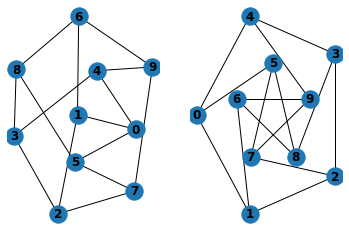

In [42]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

You can specify drawing options separately using an `options` dictionary.
You can find additional options via `draw_networkx()` and
layouts via `layout`. For example, the shell layout `draw_shell()` places different gropus of nodes in concentric circles ("shells").

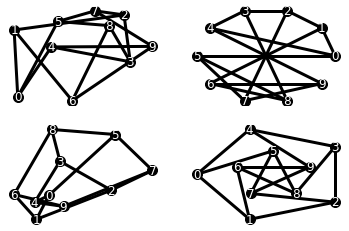

In [47]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
    'with_labels': True,
    'font_color': 'white'
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

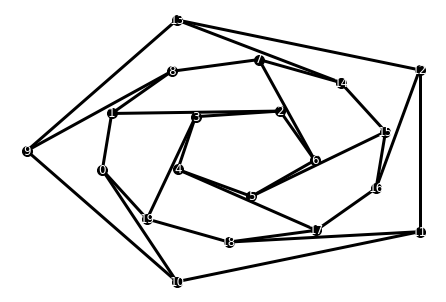

In [48]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

In [ ]:
nx.draw(G)
plt.savefig("path.png")

writes to the file `path.png` in the local directory.

See Drawing for additional details.

# **Algorithms**
NetworkX offers the implementation of a lot of network-related algorithms, which allow performing complex graph analysis in a simple way.
As an overview we present the following functions contained in the modules `networkx.algorithms.components` and `networkx.algorithms.cycles`.

## Strong connectivity
A directed graph is strongly connected if and only if every vertex in the graph is reachable from every other vertex.
`networkx.algorithms.components.is_strongly_connected` test directed graph for strong connectivity.

Is strongly connected: False


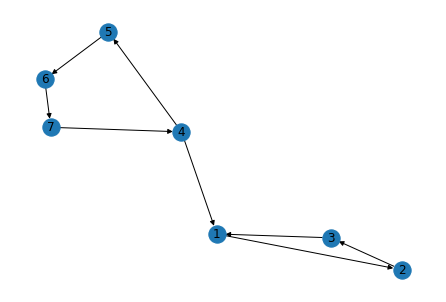

In [73]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (3, 1)])
DG.add_edges_from([(4,5), (5,6), (6,7), (7,4)])
DG.add_edge(4,1)
nx.draw(DG, with_labels=True)
print("Is strongly connected:", nx.algorithms.components.is_strongly_connected(DG))

#### Connected Components & Condensation Graphs

You can further analyze connectivity of a directed graph by computing the number of strongly connected components and the condensation graph, which is the graph with each of the strongly connected components contracted into a single node.

Number of connected components: 2


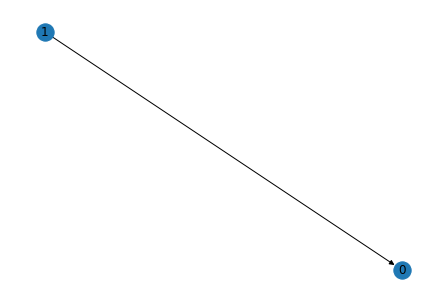

In [55]:
print("Number of connected components:", nx.algorithms.components.number_strongly_connected_components(DG))
CG = nx.algorithms.components.condensation(DG)
nx.draw(CG, with_labels=True)

CG is the condensation graph of DG. The node labels are integers corresponding to the index of the component in the list of strongly connected components of DG. 

CG has a graph attribute named ‘mapping’ with a dictionary mapping the original nodes of DG to the nodes in CG to which they belong. Each node in CG also has a node attribute ‘members’ with the set of original nodes in DG that form the strongly connected component that the node in CG represents.

In [56]:
mapping = CG.graph['mapping']  # Ritorna un dizionario che ha come key ogni nodo e value un int relativo alla connected component a cui il nodo appartiene
print(mapping)

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}


In [57]:
dict(CG.nodes)

{0: {'members': {1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}}

**Note**: all previous functions related to strong connectivity can only be applied to directed graphs. Counterparts are provided for undirected graphs.

## Sinks
In NetworkX, an attracting component in a directed graph DG is a strongly connected component with the property that a random walker on the graph will never leave the component, once it enters the component. This is equivalent to requiring that the strongly connected component is a trapping set.
Attracting components in DG consitute sinks of its condensation graph CG.

`networkx.algorithms.components.number_attracting_components` returns the number of attracting components in DG.


In [58]:
print("Number of attracting components:", nx.algorithms.components.number_attracting_components(DG))

Number of attracting components: 1


`networkx.algorithms.components.attracting_components` generates the attracting components of DG.
You can directly list nodes of DG belonging to each attracting component:

In [59]:
for c in nx.algorithms.components.attracting_components(DG):
    print(c)

{1, 2, 3}


or you can obtain the subgraphs of DG induced on each attracting component and visualize them:

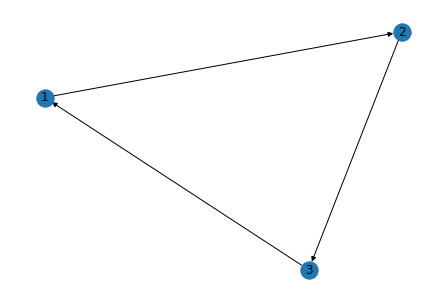

In [60]:
components = list(DG.subgraph(c).copy() for c in nx.algorithms.components.attracting_components(DG))
for c in components:
    nx.draw(c, with_labels=True)

## Cycles
A simple cycle is a closed path where no node appears twice. Two elementary circuits are considered distinct if they are not cyclic permutations of each other.

NetworkX provides cycle finding algorithms, that can be exploited to compute the periodicity of nodes and graphs.
For example, `networkx.algorithms.cycles.simple_cycles` find simple cycles of a directed graph

In [61]:
cycles = list(nx.simple_cycles(DG))  # Trova tutti i cicli in un dato grafo
for cycle in cycles:
    print("Cycle:", cycle, "Lenght:", len(cycle))

Cycle: [4, 5, 6, 7] Lenght: 4
Cycle: [1, 2, 3] Lenght: 3


### Period of a node
The period of a node is the Greatest Common Divisior of all cycles containing such node.

#### Exercise
Try to compute the period of each node in DG. 

**Hint**: exploit `networkx.algorithms.cycles.simple_cycles` and `math.gcd()`, which computes the GCD of two given numbers.
Remember that you can compute the GCD of a list of numbers sequentially:

In [74]:
from math import gcd

def gdc_from_list(number_list):
  """
  Ritorna il greater common divisor di una lista di interi
  """

  if len(number_list) == 0:
    return 0
  
  GCD = number_list[0]  # Si inizializza con il primo elemento della lista
  for n in number_list:
    GCD = gcd(GCD,n)  # confronto a due a due
  return GCD

{4: [4], 5: [4], 6: [4], 7: [4], 1: [3], 2: [3], 3: [3]}
{4: 4, 5: 4, 6: 4, 7: 4, 1: 3, 2: 3, 3: 3}


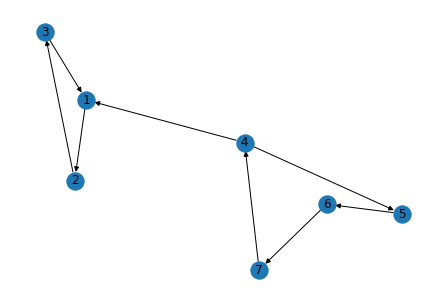

In [75]:
cycles = list(nx.simple_cycles(DG))  # Trova tutti i cicli in un dato grafo
node_dict = {}

for cycle in cycles:
  for node in cycle:
    if node not in node_dict:
      node_dict[node] = [len(cycle)]
    else:
      node_dict[node].append(len(cycle))

print(node_dict)

for node in node_dict:
  node_dict[node] = gdc_from_list(node_dict[node])


nx.draw(DG, with_labels=True)
print(node_dict)

#### Exercise
Consider the following directed graph.

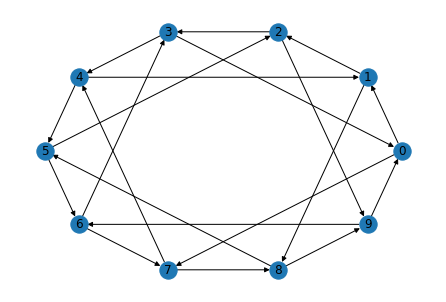

In [62]:
DG = nx.DiGraph()
n_nodes = 10
nx.add_cycle(DG, range(n_nodes))
for n in range(n_nodes):
    other = n+3
    if other>=n_nodes:
        other-=n_nodes
    DG.add_edge(other,n)
nx.draw_circular(DG, with_labels=True)


We can check that DG is strongly connected and not aperiodic

In [63]:
print("Is strongly connected:",nx.is_strongly_connected(DG))
print("Is aperiodic:",nx.is_aperiodic(DG))

Is strongly connected: True
Is aperiodic: False


In view of these facts, compute the period of the graph DG.

**Hint:** Exploit the results from previous exercise and the fact that all nodes of a strongly connected graph have the same period.

In [ ]:
# TO DO

## Spanning subgraphs
A spanning subgraph is a subgraph that contains all the vertices of the original graph. Of particular interest are spanning trees, i.e., spanning subgraphs that are trees.

We can generate all the spanning subgraphs of a given graph as follows.

In [ ]:
# As an example, construct a graph
G = nx.Graph()
nx.add_cycle(G, range(4))
G.add_edges_from([(0,2), (1,3)]) 
nx.draw_circular(G, with_labels=True)

# Define a function for computing the power set of a given set
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Use 'powerset' to compute all subgraphs of G

subgraphs = list()
for edge_set in powerset(G.edges):
    H = G.edge_subgraph(edge_set)
    subgraphs.append(H)
print("Number of subgraphs:", len(subgraphs))

#### Exercise 
Compute all spanning subtrees of G. 

**Hint:** use the previous code and exploit the following characterization of trees:
> An undirected graph T is a tree if and only if T is connected and the number of edges of T is one less that the number of its nodes.

In [ ]:
# TO DO